In [128]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
import datetime
import numpy as np

# read in data
import pandas as pd

# clean data
data = pd.read_csv('../src/data/historical_price_data_wol.csv', sep=';')
data['date'] = pd.to_datetime(data["date"])
data = data.sort_values(by='date')
data = data.drop(['label', 'acceptedDate', 'reportedCurrency', 'period', 'symbol', 'date', 'fillingDate'], axis=1)

# normalize
transformer = RobustScaler(quantile_range=(5.0, 95.0)).fit(data)
data = pd.DataFrame(transformer.transform(data), columns=data.columns)
data_labels = data.columns.tolist()
def label_to_idx(label):
    return data_labels.index(label)

# format input & output data
output_labels = ['high']
input_data = data.drop(output_labels, axis=1)
output_data = data[output_labels]
output_data_relative = output_data.copy()
for index, row in output_data.iterrows():
    if index == 0 or output_data['high'][index-1] == 0: continue
    output_data_relative['high'][index] = 1000 *(output_data['high'][index] - output_data['high'][index-1]) / output_data['high'][index-1]

rows = input_data.values
labels = input_data.columns
input_labels = input_data.columns
input_labels_number = len(input_labels)


def assess_time_correlation(tc) -> [str]:
    max_pvals = [np.Infinity] * input_labels_number
    for i, day_correlation in enumerate(tc):
        feature_sum = 0
        for i, pval in enumerate(day_correlation[1]):
            if pval != 0 and pval < max_pvals[i]:
                max_pvals[i] = pval

    avg = sum(max_pvals) / len(max_pvals)
    sorted_indicies = np.argsort(max_pvals)
    print("above average features: \n")
    for i, idx in enumerate(sorted_indicies):
        if i > 3: break
        print("{}: {}".format(input_labels[idx], max_pvals[idx]))
    return max_pvals

def assess_p_correlation(tc) -> [str]:
    max_corr = [0] * (len(data_labels) + 1)
    # max_day
    for day, day_correlation in enumerate(tc):
        output_idx = label_to_idx(output_labels[0])
        output_row = day_correlation[output_idx]
        for feature_idx, corr in enumerate(output_row):
            if corr != 0 and feature_idx != output_idx and corr > max_corr[feature_idx]:
                max_corr[feature_idx] = corr

    sorted_indicies = np.argsort(max_corr, )
#     print("above average features: \n")
#     for i, idx in enumerate(reversed(sorted_indicies)):
#         # if i > 3: break
#         if idx > len(data_labels) or idx > len(max_corr): break
#         print("{}: {}".format(data_labels[idx], max_corr[idx]))
    labels_corr = {}
    for i, idx in enumerate(reversed(sorted_indicies)):
        try:
            labels_corr[data_labels[idx]] = max_corr[idx]
        except:
            continue
    return labels_corr




# time_correlation[10] - p values for each column when shifted 10 days back
time_correlation = []
for i in range(0, 14):
    # corr = f_regression(input_data, output_data)
    corr = np.corrcoef(np.transpose(data))
    time_correlation.append(corr)
    output_data_relative = pd.concat([pd.Series(0), output_data_relative])
    input_data = pd.concat([pd.DataFrame(0, index=np.arange(1), columns=labels), input_data])

# define feature selection
# fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
# X_selected = fs.fit_transform(rows, output_data)

features_corr = assess_p_correlation(time_correlation)


/usr/lib64/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib64/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


/home/mikhailandreev/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mikhailandreev/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


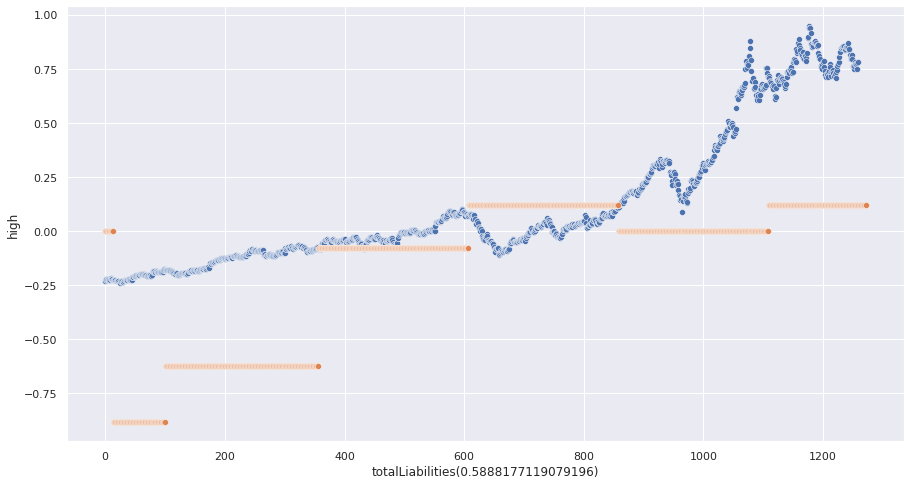

In [135]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
# plt.ylim(-4, 4)
import seaborn as sns
idx = 1
feature = 'totalLiabilities'
sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
# sns.scatterplot(input_data['close'], output_data["high"]).plot()
sns.scatterplot(range(output_data.shape[0]), output_data["high"]).plot()
# sns.scatterplot(range(input_data.shape[0]), input_data["vwap"]).plot()
ax = sns.scatterplot(range(input_data.shape[0]), input_data[feature] ).plot()
_ = plt.xlabel(xlabel=feature + "({})".format(label_corr[feature]))

In [134]:
features_corr

{'vwap': 0.9998783172267681,
 'open': 0.9997669812943102,
 'close': 0.9997031358140258,
 'adjClose': 0.9996794351118012,
 'low': 0.9995943524500437,
 'priceToOperatingCashFlowsRatio': 0.932263690105707,
 'priceCashFlowRatio': 0.932263690105707,
 'priceEarningsRatio': 0.9226305685807826,
 'companyEquityMultiplier': 0.9211688547235148,
 'debtEquityRatio': 0.9211688547235141,
 'enterpriseValueMultiple': 0.9196020168322254,
 'priceToSalesRatio': 0.9190927274650579,
 'priceSalesRatio': 0.9190927274650579,
 'priceFairValue': 0.9142133022568055,
 'priceToBookRatio': 0.9142133022568055,
 'priceBookValueRatio': 0.9142133022568055,
 'priceToFreeCashFlowsRatio': 0.9139276186528983,
 'generalAndAdministrativeExpenses': 0.904333707298317,
 'longTermDebtToCapitalization': 0.9006455892581204,
 'otherNonCurrentAssets': 0.89703451760963,
 'stockBasedCompensation': 0.8958003864643398,
 'operatingExpenses': 0.8941244098217453,
 'cashAtBeginningOfPeriod': 0.8919758638045534,
 'commonStock': 0.891938509683